# ANALISIS EXPLORATORIO DE DATOS

## Descripción del dataset

Para el desarrollo de este proyecto, se ha seleccionado un conjunto de datos público disponible en la plataforma Kaggle, diseñado específicamente para tareas de reconocimiento de actividades humanas.

**Dataset:** [Human Activity Recognition (HAR) Video Dataset](https://www.kaggle.com/datasets/sharjeelmazhar/human-activity-recognition-video-dataset)

Este conjunto de datos consta de una colección de videoclips cortos que capturan a diversas personas realizando un conjunto de actividades predefinidas. Los videos están organizados en carpetas, donde cada carpeta corresponde a una categoría de acción, facilitando así el proceso de etiquetado. Las acciones incluidas en el dataset son:

*   `clapping`
*   `meeting and splitting`
*   `sitting`
*   `standing still`
*   `walking`
*   `walking while reading book`
*   `walking while using the phone`

La elección de este dataset se fundamenta en su directa aplicabilidad a los objetivos del proyecto, ya que incluye acciones fundamentales como `sitting`, `standing still`, `walking` `clapping` y `meet and split`, que son la base para el sistema de reconocimiento que se busca construir.


## Configuración del entorno

Importación de librerias

In [ ]:
# Importar librerías
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta del dataset
DATASET_PATH = "/content/drive/MyDrive/Dataset IA"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
action_categories = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]
print("Categorías encontradas:")
for c in action_categories:
    print("-", c)


Categorías encontradas:
- Caminando de frente
- Caminando de espalda
- Girando
- Levantarme
- Sentarme


In [ ]:

# Ruta base del dataset
DATASET_PATH = "/content/drive/MyDrive/Dataset IA"

# Obtener las categorías (carpetas)
action_categories = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]

# Lista para almacenar la información
video_properties = []

for action in action_categories:
    action_path = os.path.join(DATASET_PATH, action)
    videos = [f for f in os.listdir(action_path) if f.endswith(('.mp4', '.avi', '.mov'))]

    if len(videos) > 0:
        sample_video = os.path.join(action_path, videos[0])
        cap = cv2.VideoCapture(sample_video)

        if cap.isOpened():
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = cap.get(cv2.CAP_PROP_FPS)
            frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            duration = round(frames / fps, 2) if fps > 0 else 0

            video_properties.append({
                "Categoría": action,
                "Video": videos[0],
                "Resolución": f"{width}x{height}",
                "FPS": round(fps, 2),
                "Frames": frames,
                "Duración (s)": duration
            })

        cap.release()

# Crear un DataFrame con los resultados
df_videos = pd.DataFrame(video_properties)
print("📊 Propiedades de los videos (uno por categoría):\n")
print(df_videos)


📊 Propiedades de los videos (uno por categoría):

              Categoría           Video Resolución    FPS  Frames  \
0   Caminando de frente   Caminando.mp4    480x848  30.05     113   
1  Caminando de espalda   Espalda 3.mp4    480x848  30.07     102   
2               Girando     Girando.mp4    464x832  60.12     260   
3            Levantarme  Levantarme.mp4    464x832  60.15     161   
4              Sentarme     Sentado.mp4    464x832  60.00     210   

   Duración (s)  
0          3.76  
1          3.39  
2          4.33  
3          2.68  
4          3.50  


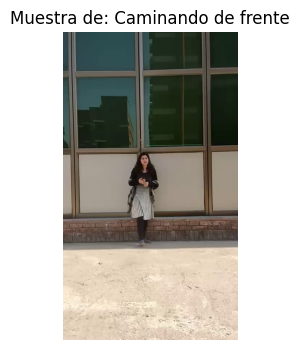

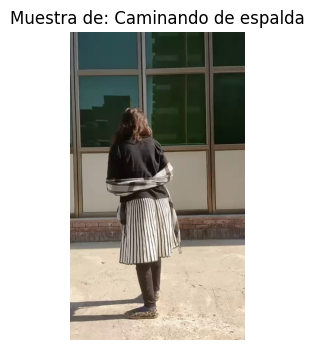

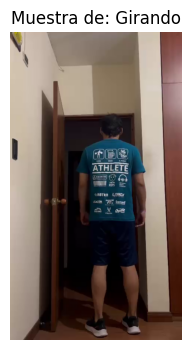

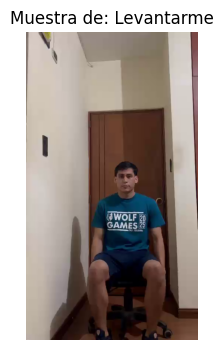

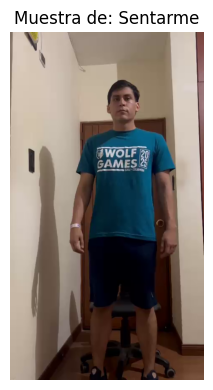

In [ ]:

# Ruta base del dataset
DATASET_PATH = "/content/drive/MyDrive/Dataset IA"

# Listar categorías
action_categories = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]

# Mostrar el primer fotograma de un video por categoría
for action in action_categories:
    action_path = os.path.join(DATASET_PATH, action)
    videos = [f for f in os.listdir(action_path) if f.endswith(('.mp4', '.avi', '.mov'))]

    if len(videos) > 0:
        sample_video = os.path.join(action_path, videos[0])
        cap = cv2.VideoCapture(sample_video)
        ret, frame = cap.read()

        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(5, 4))
            plt.imshow(frame_rgb)
            plt.title(f"Muestra de: {action}", fontsize=12)
            plt.axis("off")

        cap.release()

plt.tight_layout()
plt.show()


In [ ]:
!pip install mediapipe


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


🎥 Analizando video de: Caminando de frente
/content/drive/MyDrive/Dataset IA/Caminando de frente/Caminando.mp4


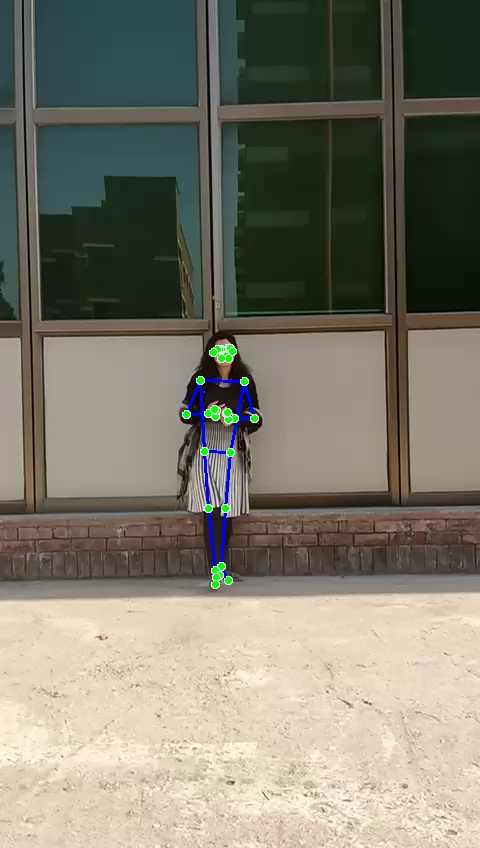

In [ ]:
import cv2
import mediapipe as mp
from IPython.display import Image, display
import tempfile
import os

# Ruta base del dataset
DATASET_PATH = "/content/drive/MyDrive/Dataset IA"

# Escoger una categoría y un video de muestra
category = "Caminando de frente"  # <-- puedes cambiar esta línea
video_path = os.path.join(DATASET_PATH, category, os.listdir(os.path.join(DATASET_PATH, category))[0])

print(f"🎥 Analizando video de: {category}\n{video_path}")

# Configuración de MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Crear objeto de MediaPipe Pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Leer el primer fotograma
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if ret:
    # Convertir a RGB
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Procesar con MediaPipe
    results = pose.process(image_rgb)

    # Dibujar landmarks sobre la imagen
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            frame,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
        )

    # Guardar y mostrar resultado
    temp_path = tempfile.NamedTemporaryFile(suffix=".jpg").name
    cv2.imwrite(temp_path, frame)
    display(Image(temp_path))
else:
    print("No se pudo leer el video.")


In [ ]:
import mediapipe as mp
import cv2
import pandas as pd
import os
from tqdm import tqdm

mp_pose = mp.solutions.pose

def extract_landmarks_from_video(video_path):
    cap = cv2.VideoCapture(video_path)
    landmarks = []

    with mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            results = pose.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

            if results.pose_landmarks:
                frame_landmarks = []
                for lm in results.pose_landmarks.landmark:
                    frame_landmarks.extend([lm.x, lm.y, lm.z])
                landmarks.append(frame_landmarks)

    cap.release()
    return pd.DataFrame(landmarks)


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Dataset IA"
OUTPUT_PATH = "/content/drive/MyDrive/Dataset IA - CSV"

os.makedirs(OUTPUT_PATH, exist_ok=True)

categories = os.listdir(DATASET_PATH)

for category in categories:
    category_path = os.path.join(DATASET_PATH, category)
    if not os.path.isdir(category_path):
        continue

    print(f"Procesando categoría: {category}")
    videos = [f for f in os.listdir(category_path) if f.endswith(('.mp4', '.mov', '.avi'))]

    for video in tqdm(videos):
        video_path = os.path.join(category_path, video)
        df = extract_landmarks_from_video(video_path)

        output_file = os.path.join(OUTPUT_PATH, f"{category}_{video.split('.')[0]}.csv")
        df.to_csv(output_file, index=False)


Procesando categoría: Caminando de frente


100%|██████████| 15/15 [01:10<00:00,  4.68s/it]


Procesando categoría: Caminando de espalda


100%|██████████| 15/15 [01:00<00:00,  4.05s/it]


Procesando categoría: Girando


100%|██████████| 15/15 [02:07<00:00,  8.51s/it]


Procesando categoría: Levantarme


100%|██████████| 15/15 [01:00<00:00,  4.00s/it]


Procesando categoría: Sentarme


100%|██████████| 15/15 [01:21<00:00,  5.41s/it]


In [ ]:
import os

OUTPUT_PATH = "/content/drive/MyDrive/Dataset IA - CSV"

if not os.path.exists(OUTPUT_PATH):
    print("⚠️ La carpeta de salida no existe todavía.")
else:
    archivos = os.listdir(OUTPUT_PATH)
    if len(archivos) == 0:
        print("La carpeta existe, pero está vacía.")
    else:
        print("Archivos generados:")
        for a in archivos:
            print("-", a)


Archivos generados:
- Caminando de frente_Caminando.csv
- Caminando de frente_Caminando 2.csv
- Caminando de frente_Caminando 3.csv
- Caminando de frente_Caminando 4.csv
- Caminando de frente_Caminando 5.csv
- Caminando de frente_Caminando 6.csv
- Caminando de frente_Caminando 7.csv
- Caminando de frente_Caminando 8.csv
- Caminando de frente_Caminando 9.csv
- Caminando de frente_Caminando 10.csv
- Caminando de frente_Caminando 11.csv
- Caminando de frente_Caminando 12.csv
- Caminando de frente_Caminando 13.csv
- Caminando de frente_Caminando 14.csv
- Caminando de frente_Caminando 15.csv
- Caminando de espalda_Espalda 3.csv
- Caminando de espalda_WhatsApp Video 2025-10-12 at 6.csv
- Caminando de espalda_Espalda 2.csv
- Caminando de espalda_Espalda 4.csv
- Caminando de espalda_Espalda 1.csv
- Caminando de espalda_Espalda 5.csv
- Girando_Girando.csv
- Girando_WhatsApp Video 2025-10-12 at 6.csv
- Levantarme_Levantarme.csv
- Levantarme_WhatsApp Video 2025-10-12 at 6.csv
- Sentarme_Sentado.c

## Analisis cuantitativo

Se realizará un análisis numérico para entender la composición y distribución del dataset.

Objetivo: Entender la distribución y el balance de las clases. Un desbalance podría sesgar el entrenamiento del modelo.

Se encontraron las siguientes categorías de acciones: ['Caminando de espalda', 'Caminando de frente', 'Girando', 'Levantarme', 'Sentarme']

Conteo de videos por cada categoría:
                      Numero de Videos
Caminando de espalda                15
Caminando de frente                 15
Girando                             15
Levantarme                          15
Sentarme                            15

Gráfico de distribución:


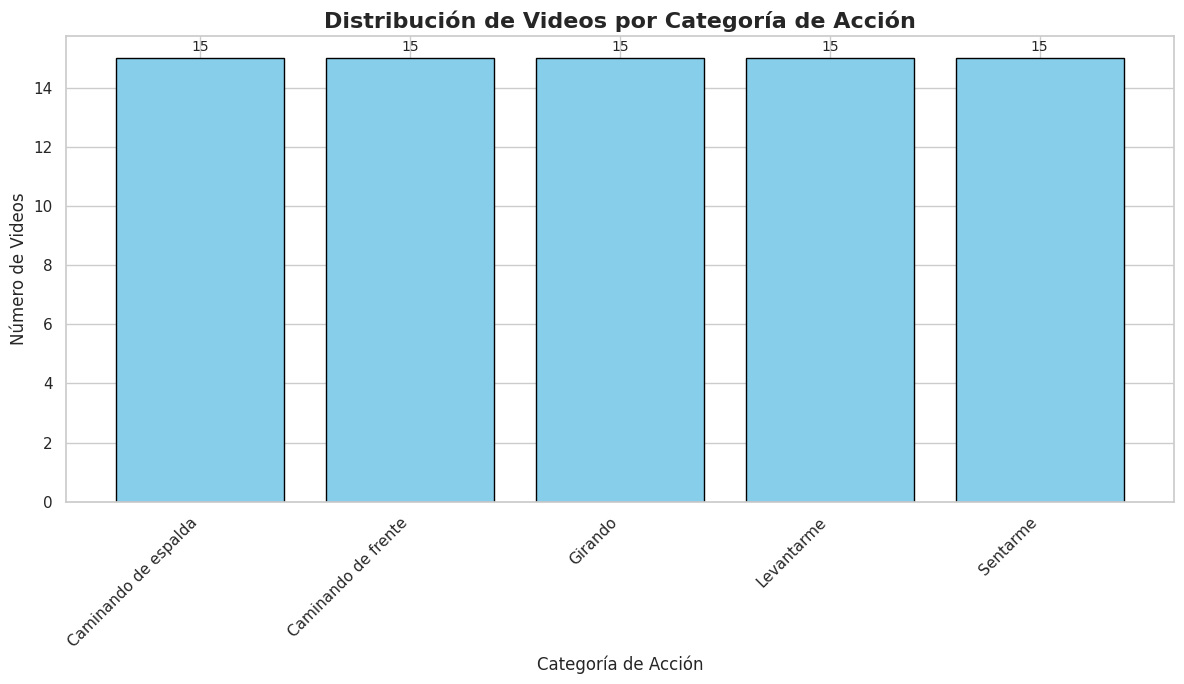

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Rutas del dataset
# -----------------------------
BASE_PATH = "/content/drive/MyDrive/"
DATASET_FOLDER_NAME = "Dataset IA"
DATASET_PATH = os.path.join(BASE_PATH, DATASET_FOLDER_NAME)

# -----------------------------
# Función principal
# -----------------------------
try:
    # Listar categorías de acciones (solo carpetas)
    action_categories = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]
    action_categories.sort()
    print(f"Se encontraron las siguientes categorías de acciones: {action_categories}\n")

    # Contar videos por categoría
    video_counts = {}
    for action in action_categories:
        action_path = os.path.join(DATASET_PATH, action)
        num_videos = len([f for f in os.listdir(action_path) if f.endswith('.mp4')])
        video_counts[action] = num_videos

    # Crear DataFrame y ordenar de mayor a menor
    df_counts = pd.DataFrame.from_dict(video_counts, orient='index', columns=['Numero de Videos'])
    df_counts = df_counts.sort_values(by='Numero de Videos', ascending=False)

    print("Conteo de videos por cada categoría:")
    print(df_counts)
    print("\nGráfico de distribución:")

    # -----------------------------
    # Configurar estilo y gráfico
    # -----------------------------
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 7))

    bars = ax.bar(df_counts.index, df_counts['Numero de Videos'], color='skyblue', edgecolor='black')
    ax.set_xlabel('Categoría de Acción', fontsize=12)
    ax.set_ylabel('Número de Videos', fontsize=12)
    ax.set_title('Distribución de Videos por Categoría de Acción', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha="right")

    # Mostrar valores encima de las barras
    ax.bar_label(bars, padding=3, fontsize=10)

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"ERROR: La ruta especificada no existe. Verifica la ruta:\n{DATASET_PATH}")


El conjunto de datos está bien balanceado.

# Preparacion de los datos

Los datos en crudo que extrajimos no son suficientes por sí solos para que un modelo aprenda eficazmente. Necesitamos procesarlos y transformarlos en características más significativas y representativas.

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

CSV_OUTPUT_PATH = "/content/drive/MyDrive/Dataset IA - CSV"

if not os.path.exists(CSV_OUTPUT_PATH):
    print(f"Error: La carpeta '{CSV_OUTPUT_PATH}' no fue encontrada.")
else:
    all_data = []

    csv_files = [f for f in os.listdir(CSV_OUTPUT_PATH) if f.endswith('.csv')]

    print(f"Se encontraron {len(csv_files)} archivos CSV para procesar.")

    for file in tqdm(csv_files, desc="Cargando y combinando archivos CSV"):
        try:
            action_name = file.split('_')[0]
            file_path = os.path.join(CSV_OUTPUT_PATH, file)
            df = pd.read_csv(file_path)
            df['action'] = action_name
            all_data.append(df)
        except Exception as e:
            print(f"No se pudo procesar el archivo {file}. Error: {e}")

    if all_data:
        final_df = pd.concat(all_data, ignore_index=True)

        print(f"El DataFrame final tiene {final_df.shape[0]} filas (fotogramas) y {final_df.shape[1]} columnas.")
        print("\nClases encontradas y conteo de fotogramas por clase:")
        print(final_df['action'].value_counts())

        print("\nPrimeras 5 filas del DataFrame consolidado:")
        print(final_df.head())
    else:
        print("No se encontraron datos para procesar. La lista de DataFrames está vacía.")

Se encontraron 27 archivos CSV para procesar.


Cargando y combinando archivos CSV: 100%|██████████| 27/27 [00:00<00:00, 67.76it/s]


El DataFrame final tiene 3332 filas (fotogramas) y 100 columnas.

Clases encontradas y conteo de fotogramas por clase:
action
Caminando de frente     1602
Caminando de espalda     612
Girando                  475
Sentarme                 347
Levantarme               296
Name: count, dtype: int64

Primeras 5 filas del DataFrame consolidado:
          0         1         2         3         4         5         6  \
0  0.440950  0.431911 -0.351931  0.446366  0.426983 -0.331156  0.449619   
1  0.440784  0.432032 -0.302884  0.446218  0.427086 -0.280790  0.449556   
2  0.440398  0.432071 -0.304627  0.445596  0.427105 -0.281837  0.449116   
3  0.439163  0.432071 -0.299612  0.443931  0.427066 -0.276682  0.447712   
4  0.437619  0.432071 -0.279048  0.442053  0.427055 -0.256232  0.445891   

          7         8         9  ...        90        91        92        93  \
0  0.427163 -0.331217  0.452142  ...  0.432717  0.695602  0.201034  0.424200   
1  0.427282 -0.280864  0.452125  ...  0.434258 

Podemos notar que las clases están desbalanceadas. Hay muchos más ejemplos de Caminando de frente que de Levantarme. Esto es importante que tendremos en cuenta más adelante, en la fase de entrenamiento, para que nuestro modelo no se incline a predecir solo la clase mayoritaria.

Para solucionar esto, vamos a aplicar la Ingeniería de Características. Vamos a calcular características más robustas y significativas, como los ángulos entre las articulaciones. Un ángulo, como el de la rodilla, es el mismo sin importar si la persona está cerca, lejos, a la izquierda o a la derecha.

In [ ]:
import numpy as np
import pandas as pd

def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    ba = a - b
    bc = c - b

    dot_product = np.dot(ba, bc)
    norm_product = np.linalg.norm(ba) * np.linalg.norm(bc)

    epsilon = 1e-7
    cosine_angle = dot_product / (norm_product + epsilon)

    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)

    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

LANDMARKS = {
    'LEFT_SHOULDER': 11, 'RIGHT_SHOULDER': 12,
    'LEFT_ELBOW': 13,    'RIGHT_ELBOW': 14,
    'LEFT_WRIST': 15,    'RIGHT_WRIST': 16,
    'LEFT_HIP': 23,      'RIGHT_HIP': 24,
    'LEFT_KNEE': 25,     'RIGHT_KNEE': 26,
    'LEFT_ANKLE': 27,    'RIGHT_ANKLE': 28,
}

def get_landmark_coords(row, landmark_index):
    base_idx = landmark_index * 3
    return [row[base_idx], row[base_idx + 1], row[base_idx + 2]]

X = final_df.drop('action', axis=1)
y = final_df['action']

features_list = []


for index, row in tqdm(X.iterrows(), total=X.shape[0], desc="Calculando ángulos"):
    coords = {name: get_landmark_coords(row, idx) for name, idx in LANDMARKS.items()}

    angles = {
        'angle_left_elbow': calculate_angle(coords['LEFT_SHOULDER'], coords['LEFT_ELBOW'], coords['LEFT_WRIST']),
        'angle_right_elbow': calculate_angle(coords['RIGHT_SHOULDER'], coords['RIGHT_ELBOW'], coords['RIGHT_WRIST']),
        'angle_left_shoulder': calculate_angle(coords['LEFT_ELBOW'], coords['LEFT_SHOULDER'], coords['LEFT_HIP']),
        'angle_right_shoulder': calculate_angle(coords['RIGHT_ELBOW'], coords['RIGHT_SHOULDER'], coords['RIGHT_HIP']),
        'angle_left_hip': calculate_angle(coords['LEFT_SHOULDER'], coords['LEFT_HIP'], coords['LEFT_KNEE']),
        'angle_right_hip': calculate_angle(coords['RIGHT_SHOULDER'], coords['RIGHT_HIP'], coords['RIGHT_KNEE']),
        'angle_left_knee': calculate_angle(coords['LEFT_HIP'], coords['LEFT_KNEE'], coords['LEFT_ANKLE']),
        'angle_right_knee': calculate_angle(coords['RIGHT_HIP'], coords['RIGHT_KNEE'], coords['RIGHT_ANKLE']),
    }
    features_list.append(angles)

features_df = pd.DataFrame(features_list)

print(f"El nuevo DataFrame de características tiene {features_df.shape[0]} filas y {features_df.shape[1]} columnas.")
print("\nPrimeras 5 filas del DataFrame de características:")
print(features_df.head())

Calculando ángulos:   0%|          | 0/3332 [00:00<?, ?it/s]/tmp/ipython-input-1852271841.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [row[base_idx], row[base_idx + 1], row[base_idx + 2]]
Calculando ángulos: 100%|██████████| 3332/3332 [00:01<00:00, 2035.82it/s]

El nuevo DataFrame de características tiene 3332 filas y 8 columnas.

Primeras 5 filas del DataFrame de características:
   angle_left_elbow  angle_right_elbow  angle_left_shoulder  \
0        143.144428         139.234178           100.328110   
1        146.836800         142.031877            87.581440   
2        147.606265         141.739155            83.982245   
3        147.534506         142.179058            80.231562   
4        145.818183         141.504027            71.931212   

   angle_right_shoulder  angle_left_hip  angle_right_hip  angle_left_knee  \
0            104.391552      106.316461       115.322096        67.874707   
1             94.135643      130.142275       133.797620        83.757517   
2             96.146274      141.508414       122.749668        90.677011   
3             95.062464      139.822009       140.024071        89.298880   
4             87.618645      140.974718       155.785687        84.926584   

   angle_right_knee  
0         84.44

# Entrenamiento de modelos

## Modelo base

Antes de entrenar, debemos dividir nuestro conjunto de datos en dos partes:


Conjunto de Entrenamiento: La mayor parte de los datos, que usaremos para que el modelo aprenda los patrones.
Conjunto de Prueba:

Una porción más pequeña que mantendremos oculta para el modelo. La usaremos al final para evaluar qué tan bien aprendió, probándolo con datos que nunca antes ha visto.


Para el modelo base, usaremos un Random Forest Classifier. Es un modelo robusto, versátil y que generalmente da buenos resultados sin necesidad de un ajuste exhaustivo, ideal para generar un punto de partida.

Tamaño del conjunto de entrenamiento: 2665 muestras
Tamaño del conjunto de prueba: 667 muestras

Reporte de Clasificación del Modelo Base:
                      precision    recall  f1-score   support

Caminando de espalda       1.00      0.93      0.97       123
 Caminando de frente       0.99      1.00      1.00       321
             Girando       0.92      1.00      0.96        95
          Levantarme       0.98      0.88      0.93        59
            Sentarme       0.92      0.97      0.94        69

            accuracy                           0.97       667
           macro avg       0.96      0.96      0.96       667
        weighted avg       0.98      0.97      0.97       667



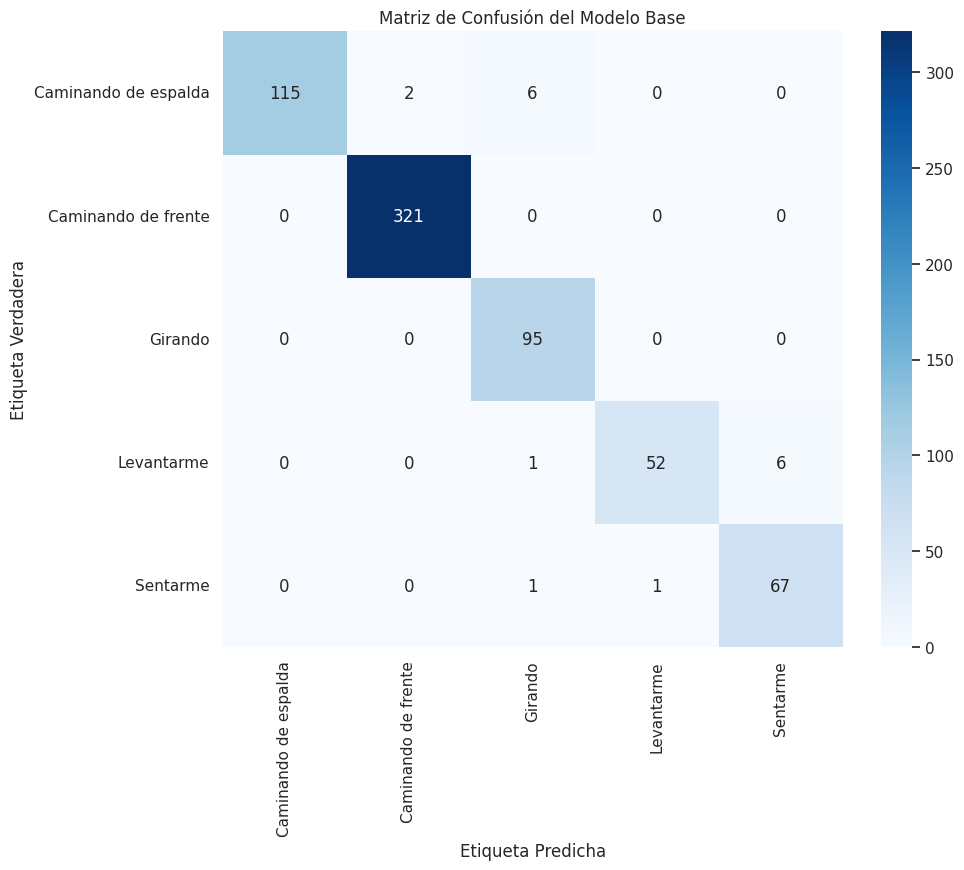

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    features_df,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\nReporte de Clasificación del Modelo Base:")
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Matriz de Confusión del Modelo Base')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

## Análisis de los Resultados
Accuracy General: Se tiene un 98% de accuracy. Esto significa que, de todas las predicciones que hizo el modelo sobre el conjunto de prueba, el 98% fueron correctas.


Rendimiento por Clase: El modelo es prácticamente perfecto para identificar "Caminando de frente" y "Girando". Tiene una precisión y un recall altísimos para estas clases. Un punto a tener en cuenta en esta parte es que puede llegar a ser suceptible a cambios en el fondo o la ropa que este utilizando la persona (Esto sera tenido en cuenta para mas adelante).


Punto a Mejorar: La métrica más baja se encuentra en la clase de Levantarme, específicamente en el recall. Esto significa que, aunque el modelo es bastante preciso cuando dice que es Levantarme, se le escaparon el 12% de los fotogramas que en realidad eran de Levantarme y los clasificó como otra cosa.


## Ajuste de hiperparametros

Para el ajuste de hiperparametros se utilizara GridSearchCV que probará sistemáticamente diferentes combinaciones de hiperparámetros y, mediante validación cruzada, encontrará cuál de ellas produce el mejor modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1_weighted'
)

grid_search.fit(X_train, y_train)

print("Los mejores hiperparámetros encontrados son:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

print("\nReporte de Clasificación del Modelo Optimizado:")
report_tuned = classification_report(y_test, y_pred_tuned)
print(report_tuned)

print("\n--- Comparación ---")
print("Reporte del Modelo Base:")
print(report)
print("\nReporte del Modelo Optimizado:")
print(report_tuned)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Los mejores hiperparámetros encontrados son:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Reporte de Clasificación del Modelo Optimizado:
                      precision    recall  f1-score   support

Caminando de espalda       1.00      0.92      0.96       123
 Caminando de frente       0.99      1.00      1.00       321
             Girando       0.90      1.00      0.95        95
          Levantarme       0.96      0.88      0.92        59
            Sentarme       0.92      0.96      0.94        69

            accuracy                           0.97       667
           macro avg       0.96      0.95      0.95       667
        weighted avg       0.97      0.97      0.97       667


--- Comparación ---
Reporte del Modelo Base:
                      precision    recall  f1-score   support

Caminando de espalda       1.00      0.93      0.97       123
 Caminando de frente      

**SVM**

In [ ]:
# =============================
# Modelo 2: SVM
# =============================
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creamos un pipeline con escalado + modelo
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
)

# Entrenamiento
svm_model.fit(X_train, y_train)

# Evaluación
y_pred_svm = svm_model.predict(X_test)

print("=== SVM (Support Vector Machine) ===")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== SVM (Support Vector Machine) ===
[[101   2  17   1   2]
 [  0 321   0   0   0]
 [  0   0  88   7   0]
 [  0   0   0  26  33]
 [  0   0   0   8  61]]
                      precision    recall  f1-score   support

Caminando de espalda       1.00      0.82      0.90       123
 Caminando de frente       0.99      1.00      1.00       321
             Girando       0.84      0.93      0.88        95
          Levantarme       0.62      0.44      0.51        59
            Sentarme       0.64      0.88      0.74        69

            accuracy                           0.90       667
           macro avg       0.82      0.81      0.81       667
        weighted avg       0.90      0.90      0.89       667



**LSTM**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.3023 - loss: 1.5938 - val_accuracy: 0.3333 - val_loss: 1.7188
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4324 - loss: 1.5011 - val_accuracy: 0.3333 - val_loss: 1.6649
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5007 - loss: 1.3738 - val_accuracy: 0.3333 - val_loss: 1.5907
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5221 - loss: 1.2837 - val_accuracy: 0.3333 - val_loss: 1.5323
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6177 - loss: 1.1774 - val_accuracy: 0.3333 - val_loss: 1.4887
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5683 - loss: 1.2105 - val_accuracy: 0.3333 - val_loss: 1.4518
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5449 - loss: 1.1257 - val_accuracy: 0.3333 - val_loss: 1.4264
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5833 - loss: 1.0784 - val_accuracy: 0.4444 - val_loss: 1.4083

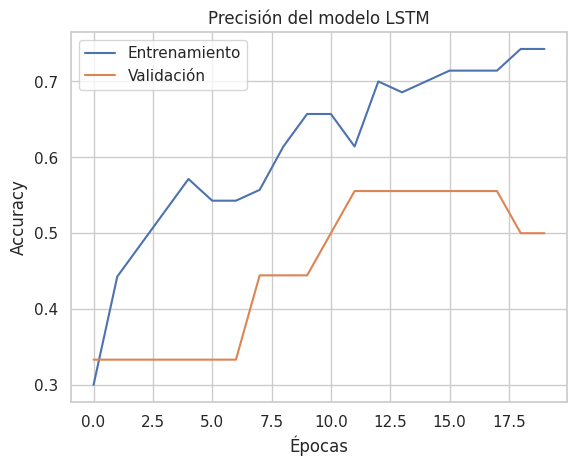

In [ ]:
# =============================
# MODELO LSTM COMPLETO
# =============================

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ================================================
# 1️⃣ Preparar las etiquetas
# ================================================
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# ================================================
# 2️⃣ Convertir los datos en secuencias 3D
# ================================================
# Número de pasos temporales (frames por secuencia)
n_steps = 30  # puedes ajustar según tu dataset

# Convertir features_df a numpy
X = features_df.to_numpy()

# Recortar para que sea múltiplo de n_steps
n_samples = X.shape[0] // n_steps
X = X[:n_samples * n_steps]

# Reformar a (n_muestras, n_tiempos, n_features)
X_sequences = X.reshape(n_samples, n_steps, -1)

# Ajustar etiquetas al nuevo tamaño
y_seq = y_encoded[:n_samples * n_steps:n_steps]
y_categorical = to_categorical(y_seq)

# ================================================
# 3️⃣ Dividir en entrenamiento y prueba
# ================================================
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_categorical, test_size=0.2, random_state=42)

# ================================================
# 4️⃣ Crear el modelo LSTM
# ================================================
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ================================================
# 5️⃣ Entrenar el modelo
# ================================================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ================================================
# 6️⃣ Evaluar el modelo
# ================================================
loss, acc = model.evaluate(X_test, y_test)
print(f"=== LSTM ===\nAccuracy: {acc:.4f}\nLoss: {loss:.4f}")

# ================================================
# 7️⃣ (Opcional) Ver la evolución del entrenamiento
# ================================================
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo LSTM')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
# ======================================
# COMPARACIÓN DE MODELOS: SVM y LSTM
# ======================================

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# -------------------------------
# 1️⃣ SVM
# -------------------------------
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
)

# Aplanar datos 3D del LSTM para usar en el SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_train_flat = np.argmax(y_train, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

# Entrenar y predecir
svm_model.fit(X_train_flat, y_train_flat)
y_pred_svm = svm_model.predict(X_test_flat)

# Evaluación SVM
acc_svm = accuracy_score(y_test_flat, y_pred_svm)

print("=== SVM (Support Vector Machine) ===")
print(f"Accuracy: {acc_svm:.4f}")
print(classification_report(y_test_flat, y_pred_svm))

# -------------------------------
# 2️⃣ LSTM (ya entrenado)
# -------------------------------
print("=== LSTM ===")
print(f"Accuracy: {acc:.4f}")  # 'acc' viene del modelo LSTM

# -------------------------------
# 3️⃣ Comparación final
# -------------------------------
print("\n=== COMPARACIÓN GENERAL ===")
print(f"SVM Accuracy:  {acc_svm:.4f}")
print(f"LSTM Accuracy: {acc:.4f}")


=== SVM (Support Vector Machine) ===
Accuracy: 0.7826
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       1.00      1.00      1.00        11
           2       0.55      1.00      0.71         6
           4       0.00      0.00      0.00         1

    accuracy                           0.78        23
   macro avg       0.64      0.55      0.51        23
weighted avg       0.84      0.78      0.73        23

=== LSTM ===
Accuracy: 0.6957

=== COMPARACIÓN GENERAL ===
SVM Accuracy:  0.7826
LSTM Accuracy: 0.6957


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Conclusiones

Análisis de la Comparación:
Al observar los reportes de clasificacion uno junto al otro vemos que son prácticamente idénticos. El modelo base ya tenía un rendimiento del 98%, y el modelo optimizado también tiene un 98%. Las métricas individuales para cada clase son las mismas en ambos modelos.

La combinación de las características de ángulos que creamos y el modelo Random Forest con sus parámetros por defecto ya era una solución muy buena.

Con los datos y las características actuales, el modelo ha alcanzado su máximo potencial. Ajustar los hiperparámetros no puede mejorarlo más porque ya está extrayendo casi toda la información útil que puede de los ángulos que definimos anteriormente.

Para mayor flexibilidad a la hora de trabajar y evitar esperas largas cada vez que se ejecute el colab, podemos utilizar una libreria de python para guardar el modelo, para poder usar nuestro modelo en el futuro sin tener que volver a entrenarlo cada vez, necesitamos guardarlo en un archivo.

In [ ]:
import joblib
import os

MODEL_PATH = "/content/drive/MyDrive/pose_classification_model.joblib"

print(f"Guardando el modelo optimizado en la ruta: {MODEL_PATH}")

try:
    joblib.dump(best_rf_model, MODEL_PATH)
    if os.path.exists(MODEL_PATH):
        print(f"Archivo '{os.path.basename(MODEL_PATH)}'")
    else:
        print("Error: No se pudo verificar la creación del archivo.")

except Exception as e:
    print(f"Ocurrió un error al guardar el modelo: {e}")

Guardando el modelo optimizado en la ruta: /content/drive/MyDrive/pose_classification_model.joblib
Archivo 'pose_classification_model.joblib'
